In [29]:
# Test the central difference matrices
include("./src/finite_diff.jl")
using Printf
# pbc f(0,y) = f(x_max,y),f(x,0) = f(x,y_max)
# descritization: delta_x = x_max/nx, delta_y = y_max/ny
# descretised field f[1 2... nx, 1 2... ny] 
# pbc: f[0,...] = f[nx,...] and f[...,0]=f[...,ny]
# f[0,...] and f[... ,0] are not included in the lattice 

x_max = y_max = 2.0*pi
nx = 64
ny = 64
N = nx*ny
delta_x = x_max/nx
delta_y = y_max/ny

x = range(delta_x,2*pi,nx)
y = transpose(range(delta_y,2*pi,ny))
f = @. sin(x)*cos(2.0*y)

# 0th order derivative
exact_derivatives = Dict((0,0)=>f)
# first derivatives(exact)
exact_derivatives[(1,0)] = @. cos(x)*cos(2.0*y)      #df/dx
exact_derivatives[(0,1)] = @. -2.0*sin(x)*sin(2.0*y) # dy/dx
# second derivatives(exact)
exact_derivatives[(2,0)] = @. -sin(x)*cos(2.0*y)     #d2f/dx2
exact_derivatives[(0,2)] = @. -4.0*sin(x)*cos(2.0*y) #d2d/dy2
exact_derivatives[(1,1)] = @. -2.0*cos(x)*sin(2.0*y) #d2/dxdy
# third derivatives(exact)
exact_derivatives[(3,0)] = @. -cos(x)*cos(2.0*y)     #d3f/dx3
exact_derivatives[(2,1)] = @. 2.0*sin(x)*sin(2.0*y) #d/dy d2f/dx2 
exact_derivatives[(1,2)] = @. -4.0*cos(x)*cos(2.0*y) #d/dx d2f/dy2 
exact_derivatives[(0,3)] = @. 8.0*sin(x)*sin(2.0*y)  #d3f/dy3 
# fourth derivatives(exact)
exact_derivatives[(4,0)] = @. sin(x)*cos(2.0*y)       #d4f/dx4
exact_derivatives[(3,1)] = @. 2.0*cos(x)*sin(2.0*y)   #d/dy d3f/dx3 
exact_derivatives[(2,2)] = @. 4.0*sin(x)*cos(2.0*y)   #d^2/dx^2 d2f/dy2 
exact_derivatives[(1,3)] = @. 8.0*cos(x)*sin(2.0*y)  #d^4f/dy4
exact_derivatives[(0,4)] = @. 16.0*sin(x)*cos(2.0*y)  #d^4f/dy4
oacc = 2
@printf("Test central difference scheme order of accuary=%i \n",oacc)
for odx in 0:2
    for ody in 0:2
        if odx + ody <= 4 && odx + ody > 0
            if odx == 0
                Dx = 1.0
            else
                Dx = diff_mat2d(nx,ny,1,odx,"central",oacc)/(delta_x^odx)
            end
            if ody == 0
                Dy = 1.0
            else
                Dy = diff_mat2d(nx,ny,2,ody,"central",oacc)/(delta_y^ody)
            end
            cdiff = Dx*Dy*reshape(f,(N,1))
            cdiff = reshape(cdiff,(nx,ny))
            rmse = sqrt(1.0/N*sum((cdiff - exact_derivatives[(odx,ody)]).^2))
            @printf("RMSE for [d/dx]^%i [d/dy]^%i is %1.8f \n",odx,ody,rmse)
        end
    end
end

oacc = 4
@printf("Test foward difference scheme order of accuary=%i \n",oacc)
for odx in 0:2
    for ody in 0:2
        if odx + ody <= 4 && odx + ody > 0
            if odx == 0
                Dx = 1.0
            else
                Dx = diff_mat2d(nx,ny,1,odx,"forward",oacc)/(delta_x^odx)
            end
            if ody == 0
                Dy = 1.0
            else
                Dy = diff_mat2d(nx,ny,2,ody,"forward",oacc)/(delta_y^ody)
            end
            cdiff = Dx*Dy*reshape(f,(N,1))
            cdiff = reshape(cdiff,(nx,ny))
            rmse = sqrt(1.0/N*sum((cdiff - exact_derivatives[(odx,ody)]).^2))
            @printf("RMSE for [d/dx]^%i [d/dy]^%i is %1.8f \n",odx,ody,rmse)
        end
    end
end


Test central difference scheme order of accuary=2 
RMSE for [d/dx]^0 [d/dy]^1 is 0.00641315 
RMSE for [d/dx]^0 [d/dy]^2 is 0.00641727 
RMSE for [d/dx]^1 [d/dy]^0 is 0.00080280 
RMSE for [d/dx]^1 [d/dy]^1 is 0.00800846 
RMSE for [d/dx]^1 [d/dy]^2 is 0.00961818 
RMSE for [d/dx]^2 [d/dy]^0 is 0.00040147 
RMSE for [d/dx]^2 [d/dy]^1 is 0.00721093 
RMSE for [d/dx]^2 [d/dy]^2 is 0.00801798 
Test foward difference scheme order of accuary=4 
RMSE for [d/dx]^0 [d/dy]^1 is 0.00029545 
RMSE for [d/dx]^0 [d/dy]^2 is 0.00224353 
RMSE for [d/dx]^1 [d/dy]^0 is 0.00000928 
RMSE for [d/dx]^1 [d/dy]^1 is 0.00031285 
RMSE for [d/dx]^1 [d/dy]^2 is 0.00227714 
RMSE for [d/dx]^2 [d/dy]^0 is 0.00003528 
RMSE for [d/dx]^2 [d/dy]^1 is 0.00036182 
RMSE for [d/dx]^2 [d/dy]^2 is 0.00237099 


In [30]:
# Test the numerical integration using Simpson's rule
include("./src/finite_diff.jl")
using Printf
x = collect(range(0.0,1.0;length=20))
y = 4.0*x.^3
s = simpson_int1d(y,(0.0,1.0))
@printf("int 4x^3 from 0 to 1 is %1.8f, error is %1.8f\n",s,abs(1.0-s))

x  = collect(range(0.0,1.0*pi;length=20))
y = sin.(x)
s = simpson_int1d(y,(0.0,1.0*pi))
@printf("int sin(x) from 0 to pi is %1.8f, error is %1.8f\n",s,abs(2.0-s))

N = 100
x = collect(range(-4.0,4.0;length=N))
y = collect(range(-4.0,4.0;length=N))
z = exp.(-x.*x .- y'.*y').*(x.^2 .+ y.^2')'.*(x.^2 .+ y.^2')
@printf(" %1.8f\n",sum(z)*64/(N*N))

s = simpson_int2d(z,(-4.0,4.0),(-4.0,4.0))
@printf("int exp(-(x^2+y^2))*(x^2+y^2) in [-4,4]*[-6,6] %1.8f, error is %1.8f\n",s,abs(pi-s))




int 4x^3 from 0 to 1 is 0.93536217, error is 0.06463783
int sin(x) from 0 to pi is 1.99544132, error is 0.00455868
 3.07907265
int exp(-(x^2+y^2))*(x^2+y^2) in [-4,4]*[-6,6] 3.14158892, error is 0.00000374


In [31]:
# test the correlation integral
include("./src/finite_diff.jl")
Nw = 30
rx = collect(range(-5.0,5.0;length=2*Nw+1))
ry = collect(range(-5.0,5.0;length=2*Nw+1))
k = exp.(-rx.^2 .- (ry.^2)')

dx = 10.0/(2*Nw)
dy = 10.0/(2*Nw)

xx = collect(dx:dx:20.0)
yy = collect(dy:dy:20.0)
g = (10 .- xx).^2 .+ ((10 .- yy).^2)'

# the index of point (10,10)
cx,cy = trunc(Int,10/dx),trunc(Int,10/dy)+1
println(k[Nw+1,Nw+1])
s = corr2d(k,g,(cx,cy),dx,dy)
i = exp.(-g).*g 

#@printf("%1.8f\n",sum(i)*dx*dy)

#@printf("%1.8f\n",simpson_int2d(i,(0.0,20),(0.0,20)))
# the correlation integral is int dxdy exp((10-x)^2+(10-y)^2))*((10-x)^2+(10-y)^2)
@printf("int dxdy exp((10-x)^2+(10-y)^2))*((10-x)^2+(10-y)^2) %1.8f, error is %1.8f\n",s,abs(pi-s))



1.0
int dxdy exp((10-x)^2+(10-y)^2))*((10-x)^2+(10-y)^2) 3.22885912, error is 0.08726646


In [32]:
# test the mean field model
include("./src/mean_field_model_gradient.jl")
using Printf
x_max = y_max = 2.0*pi
nx = ny = 256
N = nx*ny
T = 0.1
A = 0.1
B = 0.01
C = 0.01
K = 0.01
Gamma = 1.0
dt = 0.01

model = NumericalMeanField2D(x_max, y_max, nx, ny, dt)


set_model_params(model, T, A, B, C, K)
x = model.x
y = model.y'
rho = @. sin(x) * cos(2.0 * y)
rho_dx = @. cos(x) * cos(2.0 * y)
rho_dy = @. -2.0 * sin(x) * sin(2.0 * y)

rho_dxy = @. -2.0 * cos(x) * sin(2.0 * y)
rho_dxx = @. -sin(x) * cos(2.0 * y)
rho_dyy = @. -4.0 * sin(x) * cos(2.0 * y)
mu = @. 2.0*A * rho + 3.0*B * rho^ 2 - 2.0*K * (-5.0 * sin(x) * cos(2.0 * y))

j = zeros(Float64, 2, nx, ny)
j[1, :, :] = @. rho * (2.0*A * rho_dx + 6.0 * B * rho * rho_dx - 2.0*K * (-5.0 * cos(x) * cos(2.0 * y))) + T*rho_dx
j[2, :, :] = @. rho * (2.0*A * rho_dy + 6.0 * B * rho * rho_dy - 2.0*K * (10.0 * sin(x) * sin(2.0 * y))) + T*rho_dy
f = zeros(Float64, 2, nx, ny)

#sigma_xx = @. -C*(sin(x) * cos(2.0 * y))^2
#sigma_xy = @. -C*0.5 * sin(2.0 * x) * sin(4.0 * yprintln(rho))
#sigma_yy = @. -C*4.0 * (sin(x) * cos(2.0 * y))^2

f = zeros(Float64, 2, nx, ny)
f[1, :, :] = @. 2.0*C*(-sin(2.0 * x) * (cos(2.0 * y)^2) - 2.0 * sin(2.0 * x) * cos(4.0 * y))
f[2, :, :] = @. 2.0*C*(-cos(2.0 * x)* sin(4.0 * y) + 8.0 * sin(x)^2 * sin(4.0 * y))

set_initial_condition(model,rho)
update_parallel!(model)
rho_fd = reshape(model.rho,nx,ny)
rmse = sqrt(1.0/N*sum((rho_fd - rho).^2))
@printf("RMSE for rho is %1.8f \n",rmse)

# rmse of mu
mu_fd = reshape(model.mu,nx,ny)
rmse_mu = sum(abs.(mu_fd - mu))/sum(abs.(mu))
@printf("RMSE for mu is %1.8f \n",rmse_mu)
println(mu_fd[10,10])
println(mu[10,10])

# rmse of j
for alpha in 1:2
    j_fd = reshape(model.j[alpha, :, :],(nx,ny))
    rmse_j = sum(abs.(j_fd - j[alpha, :, :]))/sum(abs.(j[alpha, :, :]))
    @printf("RMSE for the %i th component of flux, j, is %1.8f \n",alpha,rmse_j)
end

# rmse of f
for alpha in 1:2
    f_fd = reshape(model.f[alpha, :, :],(nx,ny))
    rmse_f = sum(abs.(f_fd - f[alpha, :, :]))/sum(abs.(f[alpha, :, :]))
    @printf("RMSE for the %i th component of force density, f, is %1.8f \n",alpha,rmse_f)
end


LoadError: LoadError: invalid redefinition of constant NumericalMeanField2D
in expression starting at /home/richard/Documents/code/Bromf/src/mean_field_model_gradient.jl:12

In [ ]:
include("./src/mean_field_model_integral.jl")
using Printf
x_max = y_max = 60.0
nx = ny = 128
N = nx*ny
T = 1.0
R = 0.0
D = 0.0
Gamma = 1.0
dt = 0.005
# the analtical solution for 2d difustion euqation with Gaussian initial condition
# dt u = D*(dxx u + dyy u)
# rho(x,y) = 1/t*exp(-(x-x0)^2-(y-y0)^2/(4D*t))
model = NumericalMeanField2D(x_max, y_max, nx, ny, dt, "julia-Tsit5")
x = model.x 
y = model.y'
t0 = 1.0
rho_0 =  @. 1.0/t0*exp((-(x - 0.5*x_max)^2 - (y -0.5*y_max)^2)/(4*T*t0))
set_model_params(model,T,D,R,Gamma)
set_initial_condition(model,rho_0)
nsteps = [1,10,100,200,500,1000]
for nstep in nsteps
    t = dt*nstep
    rho_t = @. 1.0/(t+t0)*exp((-(x - 0.5*x_max)^2 - (y -0.5*y_max)^2)/(4*T*(t+t0)))
    set_initial_condition(model,rho_0)
    #for i in 1:nstep
    #    one_step(model)
    #end
    n_steps(model,nstep)
    rho_fd = reshape(model.rho,nx,ny)
    rmse = sum(abs.(rho_fd-rho_t))/sum(abs.(rho_t))
    @printf("RMSE for the t=%1.6f of density, rho, is %1.8f \n",t,rmse)
end



In [1]:
# test the conservation of density field
include("./src/mean_field_model_integral.jl")
using Printf
using Random, Distributions
using Plots
x_max = y_max = 60.0
nx = ny = 32
N = nx*ny
T = 0.0
R = 0.5
D = 0.00
Gamma = 1.0
dt = 0.001
# the analtical solution for 2d difustion euqation with Gaussian initial condition
# dt u = D*(dxx u + dyy u)
# rho(x,y) = 1/t*exp(-(x-x0)^2-(y-y0)^2/(4D*t))
model = NumericalMeanField2D(x_max, y_max, nx, ny, dt, "julia-Tsit5")
x = model.x 
y = model.y'
#rho_0 =  @. 1.0/t0*exp((-(x - 0.5*x_max)^2 - (y -0.5*y_max)^2)/(4*T*t0))
rho_0 = rand(Normal(0.01, 0.001), nx,ny)
set_model_params(model,T,D,R,Gamma)
set_initial_condition(model,rho_0)
for nstep in 1:10
    #for i in 1:nstep
    #    one_step(model)
    #end
    n_steps(model,4000000)
    rho_fd = reshape(model.rho,nx,ny)
    @printf("mean of rho is %1.8f \n",mean(rho_fd))
    @printf("vairance of rho is %1.8f \n",var(rho_fd))
    #heatmap(rho_fd)
end
heatmap(reshape(model.rho,nx,ny))



LoadError: LoadError: InterruptException:
in expression starting at /home/richard/Documents/code/Bromf/src/mean_field_model_integral.jl:7

sum of rho is 10.34869339 
vairance of rho is 0.00000029 
sum of rho is 10.37357278 
vairance of rho is 0.00000014 
sum of rho is 10.37850399 
vairance of rho is 0.00000009 
sum of rho is 10.37984012 
vairance of rho is 0.00000007 
sum of rho is 10.38032208 
vairance of rho is 0.00000005 
sum of rho is 10.38053839 
vairance of rho is 0.00000004 
sum of rho is 10.38065088 
vairance of rho is 0.00000004 
sum of rho is 10.38071541 
vairance of rho is 0.00000003 
sum of rho is 10.38075510 
vairance of rho is 0.00000003 
sum of rho is 10.38078084 
vairance of rho is 0.00000003 


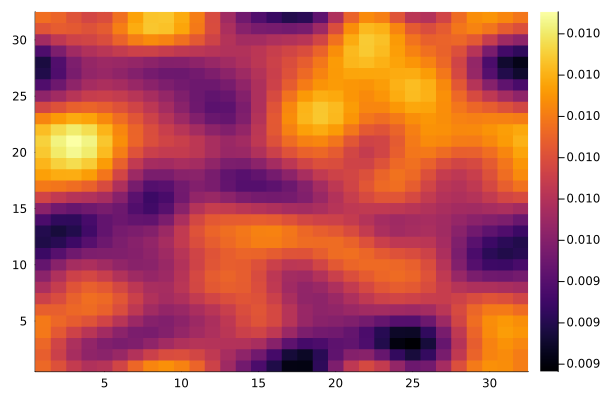

In [18]:
# test the conservation of density field
include("./src/mean_field_model_integral.jl")
using Printf
using Random, Distributions
using Plots
x_max = y_max = 60.0
nx = ny = 32
N = nx*ny
T = 0.0
R = 0.5
D = 0.00
Gamma = 1.0
dt = 0.001
# the analtical solution for 2d difustion euqation with Gaussian initial condition
# dt u = D*(dxx u + dyy u)
# rho(x,y) = 1/t*exp(-(x-x0)^2-(y-y0)^2/(4D*t))
model = NumericalMeanField2D(x_max, y_max, nx, ny, dt, "julia-Tsit5")
x = model.x 
y = model.y'
#rho_0 =  @. 1.0/t0*exp((-(x - 0.5*x_max)^2 - (y -0.5*y_max)^2)/(4*T*t0))
rho_0 = rand(Normal(0.01, 0.001), nx,ny)
set_model_params(model,T,D,R,Gamma)
set_initial_condition(model,rho_0)
for nstep in 1:10
    #for i in 1:nstep
    #    one_step(model)
    #end
    n_steps(model,4000000)
    rho_fd = reshape(model.rho,nx,ny)
    @printf("sum of rho is %1.8f \n",sum(rho_fd))
    @printf("vairance of rho is %1.8f \n",var(rho_fd))
    #heatmap(rho_fd)
end
heatmap(reshape(model.rho,nx,ny))